In [78]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [79]:
def polynomial(x):
    return 5*x**3 - 8*x**2 -7*x + 1

In [80]:
X = np.random.uniform(-20, 20, 1000)
Y = polynomial(X)

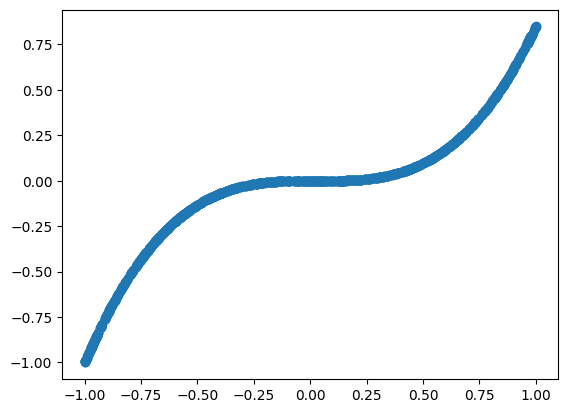

In [81]:
X_max = np.max(np.abs(X))
Y_max = np.max(np.abs(Y))
X = X / X_max
Y = Y / Y_max
plt.scatter(X, Y)

Train: 950
Test: 50


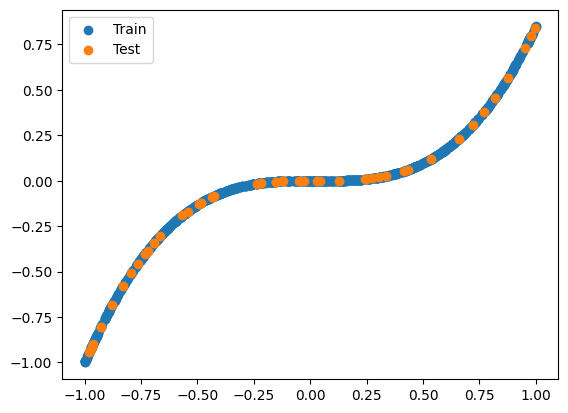

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=41)

print(f"Train: {len(x_train)}\nTest: {len(x_test)}")

plt.scatter(x_train, y_train, label="Train")
plt.scatter(x_test, y_test, label="Test")
plt.legend()
plt.show()

In [105]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=[1], activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])

def lr_scheduler(epoch, lr):
    if epoch<7:   
        return lr
    else:
        return lr * np.exp(-0.1)
learning_rate_sc = keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=0)

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
)


learning_rate=0.0005
model.compile(optimizer=Adam(learning_rate), loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                64        
                                                                 
 dense_65 (Dense)            (None, 64)                2112      
                                                                 
 dense_66 (Dense)            (None, 128)               8320      
                                                                 
 dense_67 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.05, callbacks=[early_stopping, learning_rate_sc])   

Epoch 1/20
29/29 [==============================] - 1s 17ms/step - loss: 0.0692 - accuracy: 0.4755 - val_loss: 0.0232 - val_accuracy: 0.7708 - lr: 5.0000e-04
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.8209 - val_loss: 0.0165 - val_accuracy: 0.8372 - lr: 5.0000e-04
Epoch 3/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.8653 - val_loss: 0.0122 - val_accuracy: 0.8791 - lr: 5.0000e-04
Epoch 4/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.9064 - val_loss: 0.0080 - val_accuracy: 0.9207 - lr: 5.0000e-04
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9355 - val_loss: 0.0043 - val_accuracy: 0.9576 - lr: 5.0000e-04
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 0.9619 - val_loss: 0.0027 - val_accuracy: 0.9734 - lr: 5.0000e-04
Epoch 7/20
29/29 [==============================] - 0s 7m

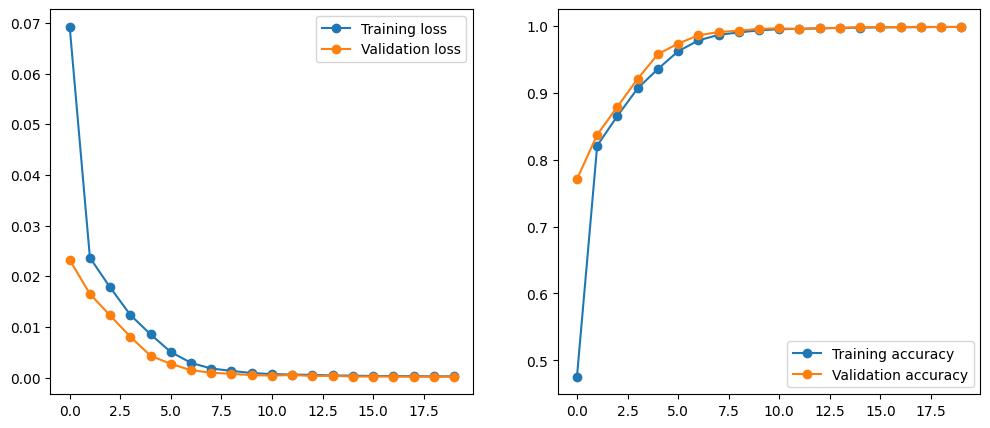

In [109]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'-o', label='Training accuracy')
plt.plot(history.history['val_accuracy'],'-o', label='Validation accuracy')
plt.legend()

In [110]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 3.1675e-04 - accuracy: 0.9982


[0.000316753750666976, 0.9981898665428162]

2/2 [==============================] - 0s 3ms/step


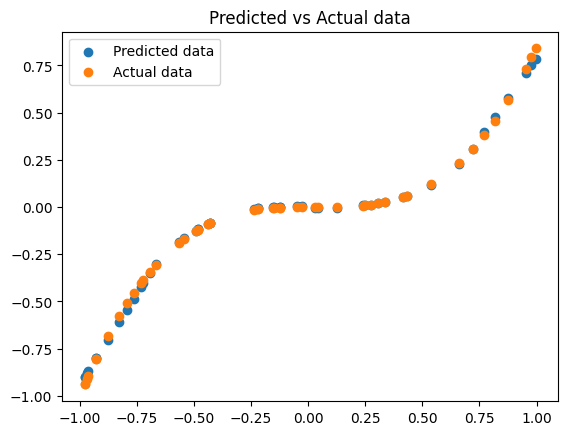

In [111]:
y_pred = model.predict(x_test)

plt.scatter(x_test, y_pred, label='Predicted data')
plt.scatter(x_test, y_test, label='Actual data')
plt.title('Predicted vs Actual data')
plt.legend()
plt.show()